<h1>Tackling an open problem</h1>

For this homework the idea is to hone our skills on exploring and plotting a dataset. You can either work with the Pokemon dataset that was given or download your own. If you opt to download your own I recommend you use one of the datasets available on kaggle,

https://www.kaggle.com/datasets

As they tend to be found in a clean format and are generally free to use.

Largely, the main objective is learning how to search the internet for new implementations you want to use on your code helping you develop your self-confidence.

There's no right or wrong, pick a dataset you enjoy and try to have some fun.
If you need, use the notebook from the previous session as a guideline.


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

usa_data = pd.read_csv('interesting usa stats/real_estate_db.csv', sep=',', encoding='latin-1')

In [47]:
usa_data.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,...,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,...,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,...,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
3,220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,...,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
4,220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,...,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


In [105]:
print(usa_data.keys())
len(usa_data['city'].unique())

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

8172

In [65]:
usa_data.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,male/female
count,39030.000000,0.0,39030.0,39030.000000,39030.000000,39030.000000,39030.000000,39030.000000,39030.000000,3.903000e+04,...,38728.000000,38728.000000,38728.000000,38728.000000,38640.000000,38755.000000,38755.000000,38755.000000,38755.000000,3.876700e+04
mean,257389.898847,NaN,140.0,85.665693,28.337023,50094.425186,595.634922,37.477816,-91.303944,1.235224e+08,...,40.288159,22.169569,546.089414,2216.030908,0.638563,0.507500,0.047664,0.019166,0.099931,inf
std,21380.595101,NaN,0.0,98.624203,16.457552,29623.012455,232.371449,5.599713,16.362850,1.146022e+09,...,8.019936,2.544665,282.793882,1084.201488,0.228346,0.137744,0.037959,0.020988,0.048898,NaN
min,220336.000000,NaN,140.0,1.000000,1.000000,601.000000,201.000000,17.929085,-166.770979,8.299000e+03,...,12.833330,0.556780,0.251910,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,238817.250000,NaN,140.0,29.000000,13.000000,26261.000000,405.000000,33.905477,-97.816437,1.777882e+06,...,34.833330,21.300528,357.978453,1480.000000,0.500337,0.424295,0.020840,0.004530,0.065420,8.818205e-01
50%,257380.500000,NaN,140.0,63.000000,28.000000,47637.500000,614.000000,38.712215,-86.587080,4.854619e+06,...,40.500000,22.502205,504.982075,2078.000000,0.689670,0.526210,0.038790,0.013580,0.094910,9.622723e-01
75%,275970.750000,NaN,140.0,109.000000,42.000000,77320.000000,801.000000,41.327773,-79.764987,3.320334e+07,...,45.333330,23.566253,682.309657,2781.000000,0.816782,0.605715,0.065180,0.027650,0.128790,1.047336e+00
max,294334.000000,NaN,140.0,840.000000,72.000000,99929.000000,989.000000,67.074017,-65.379332,1.039510e+11,...,90.166670,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000,inf


In [52]:
usa_data['male_pop'].describe()

count    39030.000000
mean      2132.500615
std       1106.519974
min          0.000000
25%       1412.000000
50%       1988.000000
75%       2673.000000
max      27962.000000
Name: male_pop, dtype: float64

(0.0, 2.0)

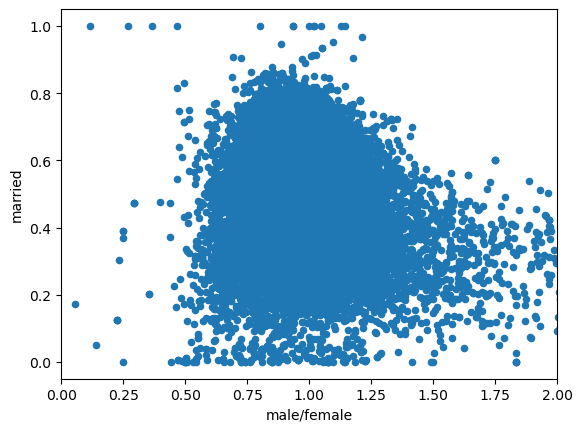

In [61]:
usa_data['male/female'] = usa_data['male_pop']/usa_data['female_pop']
usa_data.plot.scatter(x='male/female',y='married')
plt.xlim(0,2)

<Axes: xlabel='pop', ylabel='debt_cdf'>

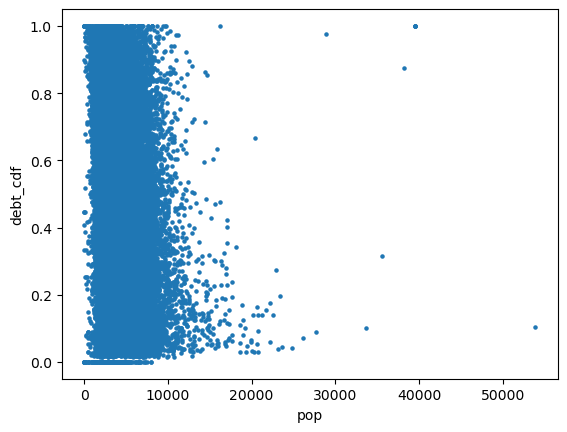

In [64]:
usa_data.plot.scatter(x='pop',y='debt_cdf', s=5)

count    104.000000
mean       0.527207
std        0.283681
min        0.055370
25%        0.260918
50%        0.498220
75%        0.787278
max        1.000000
Name: debt_cdf, dtype: float64

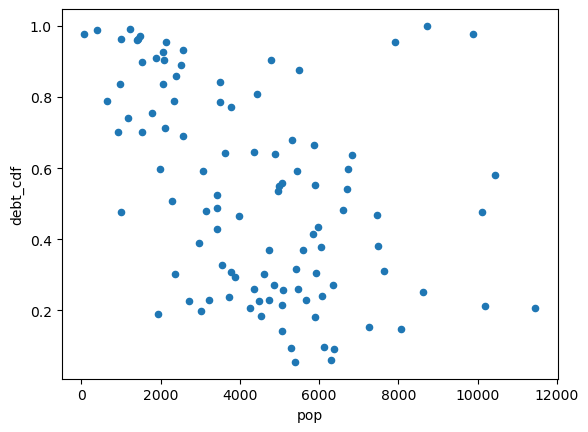

In [78]:
usa_data[usa_data['state_ab'] == 'AK'].plot.scatter(x='pop',y='debt_cdf')
usa_data[usa_data['state_ab'] == 'AK']['debt_cdf'].describe() #Alaskan debt described

count    158.000000
mean       0.452783
std        0.260379
min        0.000000
25%        0.252428
50%        0.443365
75%        0.682105
max        0.955540
Name: debt_cdf, dtype: float64

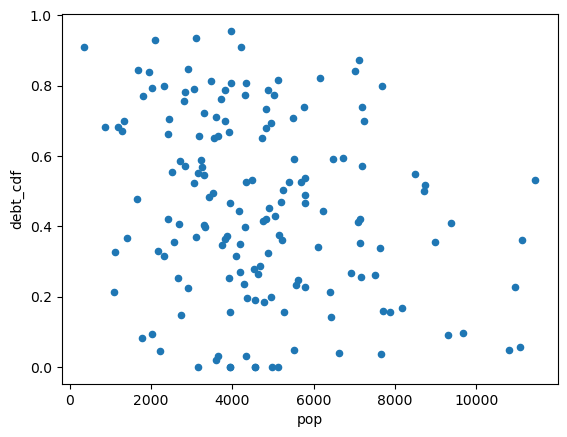

In [77]:
usa_data[usa_data['state_ab'] == 'HI'].plot.scatter(x='pop',y='debt_cdf')
usa_data[usa_data['state_ab'] == 'HI']['debt_cdf'].describe()

[3.34414219e-02 9.08604427e+02]


Text(0.5, 1.0, 'Rent as a function of population in a town')

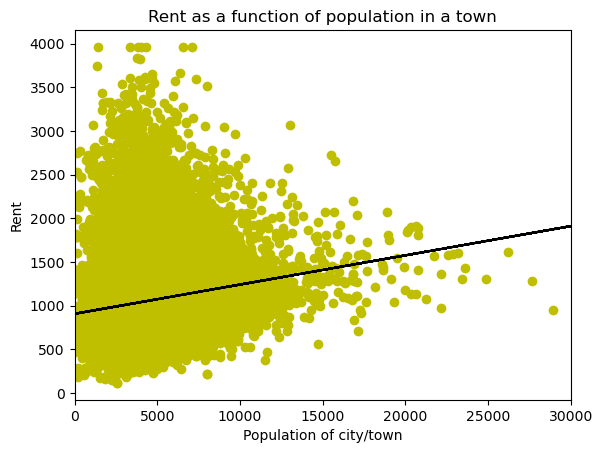

In [113]:
usa_data_cl = usa_data.dropna(subset=['rent_mean', 'pop'])
coeff = np.polyfit(usa_data_cl['pop'],usa_data_cl['rent_mean'],1)
poly1d_fn = np.poly1d(coeff)
plt.plot(usa_data_cl['pop'],usa_data_cl['rent_mean'], 'yo', usa_data_cl['pop'], poly1d_fn(usa_data_cl['pop']), '--k')
plt.xlim(0,30000)
print(coeff)
plt.xlabel('Population of city/town')
plt.ylabel('Rent')
plt.title('Rent as a function of population in a town')

In [93]:
print(usa_data['hs_degree_female'].mean(),usa_data['hs_degree_male'].mean())

0.8643532820009302 0.8512397181280815


In [94]:
usa_data['family_mean'].describe()

count     38596.000000
mean      78896.820614
std       31564.999881
min        5374.842520
25%       56624.058887
50%       72854.955360
75%       95914.497627
max      242857.142860
Name: family_mean, dtype: float64

Text(0.5, 1.0, 'Rent in Alaska as a function of male to female ratio')

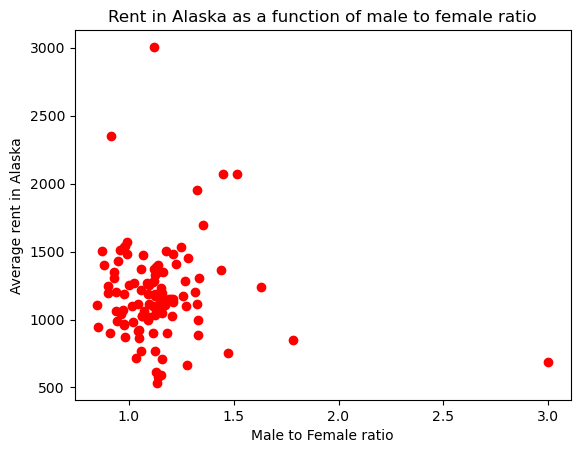

In [102]:
plt.scatter(usa_data[usa_data['state_ab'] == 'AK']['male/female'], usa_data[usa_data['state_ab'] == 'AK']['rent_mean'], c='red')
plt.xlabel('Male to Female ratio')
plt.ylabel('Average rent in Alaska')
plt.title('Rent in Alaska as a function of male to female ratio')